In [8]:
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt

In [4]:
engine = create_engine("sqlite:///ecommerce.db")

In [9]:
df = pd.read_csv(r'..\dados\produtos.csv')

In [10]:
df.head()

,Produto,Categoria,Preço,Quantidade,Data_Venda
0,Camisa,Roupas,50.0,10,2023-01-01
1,Calça,Roupas,100.0,15,2023-01-02
2,Saia,Roupas,80.0,20,2023-01-03
3,Camiseta,Roupas,45.0,30,2023-01-04
4,Jaqueta,Roupas,120.0,5,2023-01-05


In [10]:
try:
    df.to_sql('produtos', con = engine, if_exists='replace', index=False)
    print(f'convertido!')

except Exception as e:
    print(f'ocorreu um erro {e}')

convertido!


In [ ]:
#Visualização rápida
visul = 'SELECT * FROM produtos'
resulVisul =  pd.read_sql_query(visul, engine)
resulVisul

,Produto,Categoria,Preço,Quantidade,Data_Venda
0,Camisa,Roupas,50.0,10,2023-01-01
1,Calça,Roupas,100.0,15,2023-01-02
2,Saia,Roupas,80.0,20,2023-01-03
3,Camiseta,Roupas,45.0,30,2023-01-04
4,Jaqueta,Roupas,120.0,5,2023-01-05
5,Vestido,Roupas,90.0,12,2023-01-06
6,Bermuda,Roupas,60.0,18,2023-01-07
7,Sapato,Calçados,150.0,7,2023-01-08
8,Sandália,Calçados,70.0,25,2023-01-09
9,Tênis,Calçados,200.0,8,2023-01-10


In [ ]:
#Total de vendas por categoria

In [53]:
consul1 = 'SELECT Categoria, SUM(Preço) AS Valor_total FROM produtos GROUP BY Categoria ORDER BY Valor_total DESC'
resul1 = pd.read_sql_query(consul1, engine)
resul1

,Categoria,Valor_total
0,Roupas,835.0
1,Calçados,600.0
2,Acessórios,515.0


In [52]:
#Produto com mais vendas
consul2 = 'SELECT  Categoria, SUM(Quantidade) as Qtd FROM produtos GROUP BY Categoria ORDER BY Qtd DESC LIMIT 1'
resul2 = pd.read_sql_query(consul2, engine)
resul2

,Categoria,Qtd
0,Roupas,163


In [63]:
#Total de pendas por produto
consul3 = 'SELECT Produto, SUM(Quantidade) AS Qtd FROM produtos GROUP BY Produto ORDER BY Qtd DESC'
resul3 =  pd.read_sql_query(consul3, engine)
resul3

,Produto,Qtd
0,Camiseta,30
1,Brinco,30
2,Sandália,25
3,Cinto,22
4,Saia,20
5,Shorts,19
6,Bermuda,18
7,Mochila,15
8,Calça,15
9,Blusa,14


In [24]:
#Média de preço por produto
consul4 =  'SELECT Produto, AVG(Preço) as Média FROM produtos GROUP BY Produto ORDER BY Média ASC'
resul4 =  pd.read_sql_query(consul4, engine)
resul4

,Produto,Média
0,Brinco,35.0
1,Cinto,40.0
2,Camiseta,45.0
3,Camisa,50.0
4,Blusa,55.0
5,Bermuda,60.0
6,Shorts,65.0
7,Mochila,70.0
8,Sandália,70.0
9,Saia longa,75.0


<Axes: title={'center': 'Média de Preço por Produto'}, xlabel='Média', ylabel='Produtos'>

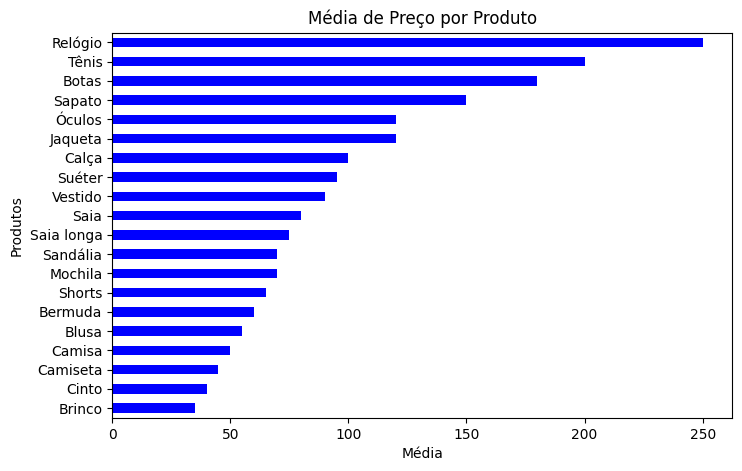

In [28]:
resul4.plot(
    kind='barh',
    x='Produto',
    y='Média',
    title='Média de Preço por Produto',
    color='blue',
    xlabel= 'Média',
    ylabel='Produtos',
    legend=False,
    figsize=(8, 5)
)